# Procesamiento de Lenguage Natural

# Taller #8: Agrupación de textos

Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).

Modo de entrega: Subir link de GitHub al aula virtual.

In [169]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot


from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from IPython.display import Image


In [97]:
data = pd.read_csv("C:/Users/usuario/Desktop/NLP/22_Febrero/reviews_vidjew_es.csv")
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [98]:
print(f"Tenemos {data.shape[0]} registros.")

Tenemos 1000 registros.



# [10 pts] Punto 1: Hacer pre-procesamiento del tex

In [99]:
stopwords_sp = stopwords.words('spanish')

In [100]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto


In [101]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

In [42]:
tfidf_matrix

,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,aboné,abre,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# [10 pts] Punto 2: Método del codo para determinar $K$

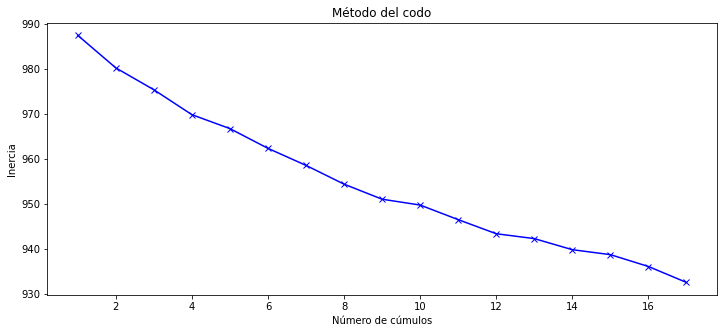

In [110]:
ks = []
k_inertias = []

for k in range(1,18):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    ks.append(k)
    k_inertias.append(k_inertia)
    
    
plt.figure(figsize=(12,5))     
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');


# [10 pts] Punto 3: Entrenar modelo con el $K$ escogido

In [114]:
k = 8
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

data['cluster'] = model.labels_
data


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,2
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,0
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,1
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,3
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,3
...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,5
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,3
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,3
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,1


In [115]:
nbrs = NearestNeighbors(n_neighbors=7, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print(),

Cluster # 0
Tiene 46 registros (4.60% de los datos)

Cluster # 1
Tiene 436 registros (43.60% de los datos)

Cluster # 2
Tiene 91 registros (9.10% de los datos)

Cluster # 3
Tiene 118 registros (11.80% de los datos)

Cluster # 4
Tiene 60 registros (6.00% de los datos)

Cluster # 5
Tiene 123 registros (12.30% de los datos)

Cluster # 6
Tiene 50 registros (5.00% de los datos)

Cluster # 7
Tiene 76 registros (7.60% de los datos)



In [116]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in data.iloc[nbrs.kneighbors([centroides[i]])[1][0]].review_body	.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()

Cluster # 0
Tiene 46 registros (4.60% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
producto llegado si día regalo mas mando bonitos pulsera bonita esperaba mal grandes solo recibido caja llegó precio gustado gusta 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Todo en perfecto estado

 *** Perfecto y en tiempo

 *** Todo ha sido perfecto.


********************************************

Cluster # 1
Tiene 436 registros (43.60% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
bien foto cadena precio aunque bastante bonitos fina quedan calidad pequeños queda demasiado producto solo llegó funciona recomiendo ve momento 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** No ha llegado el collar . Las demás cosas que he comprado en Amazon han llegado, pero este producto no me ha llegado.

 *** El producto ha llegado antes de lo previsto, me ha gustado su calidad es más pequeño de lo esperado pero me gusta. Vale la pena.

 *** Hoy es el día límite y no me he llegado el producto.


*****************************************

# [BONUS: 3 pts] Visualización usando PCA

In [138]:
clusters = {0:'video_games',
            1:'video_games',
            2:'jewelry',
            3:'video_games',
            4:'jewelry',
            5:'jewelry',
            6:'jewelry',
            7:'video_games'}

data['nombres_clusters'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(5)

df_centroids = pd.DataFrame(centroids)
df_centroids['cluster'] = clusters.values()
df_centroids

,0,1,2,3,4,5,6,7,8,9,...,3657,3658,3659,3660,3661,3662,3663,3664,3665,cluster
0,9.450921e-04,8.140383e-04,1.626303e-19,2.959245e-04,-1.138412e-18,1.301614e-03,1.095288e-03,-1.084202e-19,7.223844e-04,1.245684e-03,...,1.192622e-18,2.959245e-04,3.437828e-04,0.000000e+00,-2.710505e-19,3.226362e-04,5.653789e-04,2.776743e-03,2.288911e-03,video_games
1,3.615850e-03,-2.168404e-19,1.084202e-19,2.710505e-20,1.751314e-03,1.448486e-03,-5.421011e-19,-5.421011e-20,5.421011e-20,4.336809e-19,...,5.421011e-19,2.710505e-20,8.131516e-20,-2.168404e-19,1.626303e-19,1.573063e-03,-1.084202e-19,8.171956e-04,-4.336809e-19,video_games
2,-2.168404e-19,8.673617e-19,1.084202e-19,8.131516e-20,0.000000e+00,1.084202e-19,1.757331e-03,-2.710505e-20,1.084202e-19,2.168404e-19,...,-1.084202e-19,8.131516e-20,-2.710505e-20,-1.626303e-19,1.084202e-19,2.168404e-19,1.084202e-19,4.900387e-03,4.336809e-19,jewelry
3,-4.336809e-19,2.168404e-19,1.084202e-19,8.131516e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.421011e-20,3.252607e-19,...,1.084202e-19,8.131516e-20,-2.710505e-20,-1.626303e-19,1.084202e-19,1.811765e-03,1.084202e-19,4.336809e-19,2.168404e-19,video_games
4,-3.252607e-19,1.717583e-02,5.421011e-20,2.710505e-20,0.000000e+00,1.084202e-19,1.084202e-19,0.000000e+00,5.421011e-20,1.084202e-19,...,1.084202e-19,2.710505e-20,0.000000e+00,-1.084202e-19,0.000000e+00,-2.168404e-19,1.084202e-19,2.810036e-03,0.000000e+00,jewelry
5,-1.084202e-19,0.000000e+00,5.421011e-20,0.000000e+00,4.672114e-03,0.000000e+00,0.000000e+00,2.710505e-20,0.000000e+00,-1.084202e-19,...,0.000000e+00,0.000000e+00,-2.710505e-20,7.840579e-03,-5.421011e-20,6.177682e-03,5.421011e-20,4.336809e-19,-2.168404e-19,jewelry
6,-1.084202e-19,4.336809e-19,5.421011e-20,2.710505e-20,0.000000e+00,1.084202e-19,0.000000e+00,2.710505e-20,5.421011e-20,0.000000e+00,...,1.535902e-02,2.710505e-20,-5.421011e-20,0.000000e+00,0.000000e+00,6.254285e-03,1.084202e-19,4.336809e-19,6.223102e-03,jewelry
7,-3.252607e-19,6.505213e-19,4.658743e-03,2.710505e-20,0.000000e+00,1.084202e-19,0.000000e+00,2.722913e-03,5.421011e-20,0.000000e+00,...,0.000000e+00,2.710505e-20,-2.710505e-20,-1.084202e-19,4.871668e-03,-2.168404e-19,5.421011e-20,3.053394e-03,0.000000e+00,video_games


In [126]:
! pip install plotly

In [139]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.texto_peq.values

 
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['cluster'].values)) 

layout = go.Layout(title="PCA")


fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [137]:
result.head(20)

,X,Y,cluster,texto
0,0.486614,-0.321069,2,"Buen. Buena calidad, y buena presentación."
1,-0.106757,-0.147410,0,"Un producto a perfecto, para salir de casa con..."
2,-0.071121,-0.029126,1,No funciona con Nintendo Switch. No hay forma ...
3,0.031654,0.234674,3,"Recomendado, los utilizo para pc y no me dan n..."
4,0.016502,0.097285,3,El cable funciona bien podria ser un poco mas ...
5,-0.042808,0.052596,5,És muy bonito pero la empuñadura de la espada ...
6,0.180562,-0.070923,2,Lo compré para regalar y repetiré la compra se...
7,-0.061500,-0.058091,1,Señores: Dos veces he comprado este producto y...
8,0.114621,0.041888,2,Son muy cómodos y se adaptan perfectamente. Se...
9,-0.058675,-0.094335,4,"El acabado de este joyero de viaje ""da el pego..."


# Comparación


# [BONUS 20 pts (validos para cualquier tarea)]

# Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

## Modelo de la clase pasada 

In [145]:
tfidf_vect_pasado = TfidfVectorizer(preprocessor=pre_procesado)

In [151]:
train, test = train_test_split(data, test_size=0.2, random_state=42)


In [152]:
#X_train

X_train = tfidf_vect_pasado.fit_transform(train.review_body.values)

#Y_train

y_train = train.product_category.values

#X_test 

X_test = tfidf_vect_pasado.transform(test.review_body.values)

#Y_test 

y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")


Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


# Entrenar el modelo

In [159]:
logreg = LogisticRegression(class_weight='balanced')

In [161]:
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [162]:
y_pred_logreg = logreg.predict(X_test)

In [163]:
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")

Regresión Logística:    0.86


# Predicción para estas dos frases de los dos modelos (clasificación y  𝑘 -means)

In [153]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]

In [164]:
pred_clasificación = tfidf_vect_pasado.transform(test)

# Resultado para clasificación

In [165]:
print(logreg.predict(pred_clasificación))

['video_games' 'jewelry']


# Resultado para agrupación

In [167]:
pred_grupo = tfidf_vect.transform(test)

In [168]:

print(model.predict(pred_grupo))
pred=pd.DataFrame(model.predict(pred_grupo))
pred[0] = pred[0].apply(lambda val: clusters[val])
pred

[7 2]


,0
0,video_games
1,jewelry



# [5 pts] Punto 5: Preguntas

1. Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?

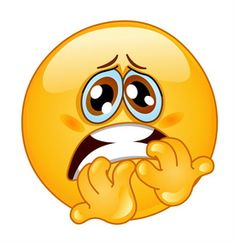Rta// Según los resultados del 𝐾 -Means, La estructura de datos es un dataframe en formato con variable de tipo cualitativo.

2. ¿Qué diferencia notó entre los resultados del taller pasado y este?

RTA// El modelo de agrupamiento es mucho mas largo, me parecio mas practico el modelo anterior dado que las predicciones son similares. 

3. ¿Alguna otra observación?

RTA// No es facil interpretar los resultados de los cluster.